In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch
from torch.utils.data import DataLoader
from torchvision import  datasets
from torchvision.transforms import transforms
from add_noise import add_noise
import  distortion


In [30]:
batch_size = 1
lr = 0.001
epoch = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [31]:
data_tf = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor()
])
data = datasets.ImageFolder('Stanford Dogs Dataset_datasets/Stanford Dogs Dataset_images_datasets/Images',transform=data_tf)
train_loader = DataLoader(data, shuffle=False, batch_size=batch_size)


In [29]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 8, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, 3, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 3, 3, stride=2, padding=1, output_padding=1),
        )
    def forward(self, x):
        encode = self.encoder(x)
        decode = self.decoder(encode)
        return encode, decode
criterion = nn.MSELoss()
# 实例化一个模型，并迁移至gpu
model = autoencoder().to(device)
model.load_state_dict(torch.load('./autoencoder2.pth'))
optimizier = torch.optim.Adam(model.parameters(), lr=lr)

In [40]:
model.train()
for i in range(epoch):
    for img, label in train_loader:
        img = img.to(device)
        # forward
        encode, decode = model(img)
        loss = criterion(decode,img)
        # backward
        optimizier.zero_grad()
        loss.backward()
        optimizier.step()
    print("epoch: {}, loss is {:.4f}".format((i+1), loss.data))
torch.save(model.state_dict(), './autoencoder2.pth')

epoch: 1, loss is 0.1094
epoch: 2, loss is 0.0429
epoch: 3, loss is 0.0249
epoch: 4, loss is 0.0173
epoch: 5, loss is 0.0139
epoch: 6, loss is 0.0120
epoch: 7, loss is 0.0108
epoch: 8, loss is 0.0100
epoch: 9, loss is 0.0094
epoch: 10, loss is 0.0088
epoch: 11, loss is 0.0084
epoch: 12, loss is 0.0079
epoch: 13, loss is 0.0076
epoch: 14, loss is 0.0072
epoch: 15, loss is 0.0070
epoch: 16, loss is 0.0068
epoch: 17, loss is 0.0066
epoch: 18, loss is 0.0064
epoch: 19, loss is 0.0062
epoch: 20, loss is 0.0060
epoch: 21, loss is 0.0059
epoch: 22, loss is 0.0057
epoch: 23, loss is 0.0056
epoch: 24, loss is 0.0055
epoch: 25, loss is 0.0054
epoch: 26, loss is 0.0052
epoch: 27, loss is 0.0051
epoch: 28, loss is 0.0050
epoch: 29, loss is 0.0049
epoch: 30, loss is 0.0048
epoch: 31, loss is 0.0048
epoch: 32, loss is 0.0047
epoch: 33, loss is 0.0046
epoch: 34, loss is 0.0045
epoch: 35, loss is 0.0044
epoch: 36, loss is 0.0044
epoch: 37, loss is 0.0043
epoch: 38, loss is 0.0042
epoch: 39, loss is 0.

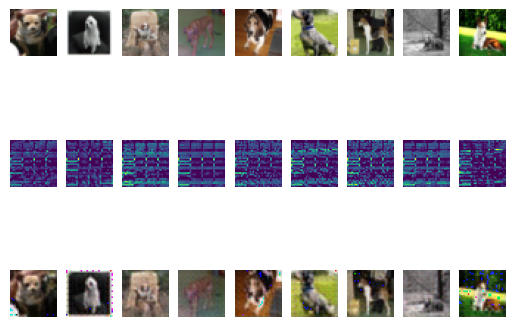

In [54]:
model.eval()
with torch.no_grad():
    i = 0
    for img, _ in train_loader:
        if i <= 9:
            img = img.to(device)
            # forward
            latent, output = model(img)
            plt.subplot(3,9,i+1)
            old_img = transforms.ToPILImage()(img[0].to('cpu')).convert('RGB')
            plt.imshow(old_img)
            plt.axis(False)
            plt.subplot(3,9,i+10)
            plt.imshow(np.array(latent[0].to('cpu')).reshape([32,32]))
            plt.axis(False)
            plt.subplot(3,9,i+19)
            new_img = transforms.ToPILImage()(output[0].to('cpu')).convert('RGB')
            plt.imshow(new_img)
            plt.axis(False)
        i += 1 
        if i == 9:
            break
plt.show()

In [74]:
rd = np.random.RandomState(888) 
# 随机整数
matrix = np.sort(rd.choice(20580, 256, replace=False))

In [78]:
model.eval()
k = 0
i = 0
latent_list = []
with torch.no_grad():
    for img, _ in train_loader:
        if i == matrix[k]:
            k += 1
            img = img.to(device)
            # forward
            latent, output = model(img)
            latent_list.append(np.array(latent.to('cpu')))
        i += 1
        if k == 256:
            break

In [81]:
latent_list = np.array(latent_list)[:,0,:,:,:]
latent_array = np.array(latent_list).reshape([256,-1]).T
latent_mean = np.mean(latent_array,axis=1)
latent_cov = np.cov(latent_array)
latent_rand = rd.multivariate_normal(latent_mean,latent_cov,size=9).reshape([9,1,16,8,8])
latent_rand = np.array(latent_rand,dtype=np.float32)

In [6]:
class decoder(nn.Module):
    def __init__(self):
        super(decoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 8, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, 3, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 3, 3, stride=2, padding=1, output_padding=1),
        )
    def forward(self, x):
        decode = self.decoder(x)
        return decode
decoder1 = decoder()
decoder1.load_state_dict(torch.load('./autoencoder2.pth'))

<All keys matched successfully>

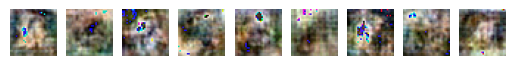

In [135]:
with torch.no_grad():
    for i in range(9):
        a = decoder1(torch.from_numpy(latent_rand[i]))
        plt.subplot(1,9,i+1)
        img = transforms.ToPILImage()(a[0]).convert('RGB')
        plt.imshow(img)
        plt.axis(False)
    plt.show()

In [137]:
def addNoise(input, noise_factor):
    x = np.array(input,dtype=np.float32)
    x_train_noisy = x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x.shape)
    x_train_noisy = np.array(x_train_noisy,dtype=np.float32)
    train = torch.from_numpy(x_train_noisy)
    return train

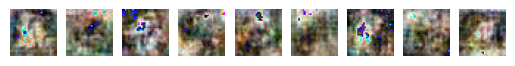

In [141]:
with torch.no_grad():
    for i in range(9):
        a = decoder1(addNoise(latent_rand[i],0.1))
        plt.subplot(1,9,i+1)
        img = transforms.ToPILImage()(a[0]).convert('RGB')
        plt.imshow(img)
        plt.axis(False)
    plt.show()

In [28]:
class normautoencoder(nn.Module):
    def __init__(self):
        super(normautoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 8, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, 3, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 3, 3, stride=2, padding=1, output_padding=1),
        )
        self.addno = add_noise(0.15)
    def forward(self, x):
        encode = self.encoder(x)
        x = self.addno(encode)
        decode = self.decoder(x)
        return encode, decode
    
criterion = nn.MSELoss()
# 实例化一个模型，并迁移至gpu
model = normautoencoder().to(device)
#model.load_state_dict(torch.load('./normautoencoder_0.05.pth'))
optimizier = torch.optim.Adam(model.parameters(), lr=lr)

In [29]:
model.train()
for i in range(epoch):
    for img, label in train_loader:
        img = img.to(device)
        # forward
        encode, decode = model(img)
        loss = criterion(decode,img)
        # backward
        optimizier.zero_grad()
        loss.backward()
        optimizier.step()
    print("epoch: {}, loss is {:.4f}".format((i+1), loss.data))
torch.save(model.state_dict(), './normautoencoder_0.15.pth')

epoch: 1, loss is 0.1741
epoch: 2, loss is 0.0894
epoch: 3, loss is 0.0520
epoch: 4, loss is 0.0384
epoch: 5, loss is 0.0313
epoch: 6, loss is 0.0265
epoch: 7, loss is 0.0231
epoch: 8, loss is 0.0198
epoch: 9, loss is 0.0178
epoch: 10, loss is 0.0164
epoch: 11, loss is 0.0154
epoch: 12, loss is 0.0146
epoch: 13, loss is 0.0138
epoch: 14, loss is 0.0134
epoch: 15, loss is 0.0128
epoch: 16, loss is 0.0124
epoch: 17, loss is 0.0121
epoch: 18, loss is 0.0119
epoch: 19, loss is 0.0116
epoch: 20, loss is 0.0114
epoch: 21, loss is 0.0112
epoch: 22, loss is 0.0111
epoch: 23, loss is 0.0109
epoch: 24, loss is 0.0107
epoch: 25, loss is 0.0106
epoch: 26, loss is 0.0103
epoch: 27, loss is 0.0102
epoch: 28, loss is 0.0102
epoch: 29, loss is 0.0101
epoch: 30, loss is 0.0102
epoch: 31, loss is 0.0099
epoch: 32, loss is 0.0099
epoch: 33, loss is 0.0097
epoch: 34, loss is 0.0098
epoch: 35, loss is 0.0098
epoch: 36, loss is 0.0096
epoch: 37, loss is 0.0096
epoch: 38, loss is 0.0094
epoch: 39, loss is 0.

In [32]:
model.eval()
with torch.no_grad():
    decode_list =[]
    img_list = []
    for img, label in train_loader:
        img_list.append(np.array(img))
        img = img.to(device)
        # forward
        encode, decode = model(img)
        decode_list.append(np.array(decode.to('cpu')))
    decode_list = np.array(decode_list)
    img_list = np.array(img_list)
    decode_list = decode_list[:,0,:,:,:]

In [33]:
img_list = img_list[:,0,:,:,:]
x = torch.from_numpy(decode_list)
y = torch.from_numpy(img_list)

In [34]:
import math

mse = distortion.MSE()
MSE = mse(x,y)
PSNR = 10 * math.log10(1 ** 2 / (MSE))

In [35]:
PSNR

19.97502011468057